  ## $\frac{\partial u}{\partial t} = v$
  ## $\frac{\partial v}{\partial t} = -k\nabla^4 u$

In [1]:
using ViscousFlow

In [2]:
using Plots
using LinearAlgebra
pyplot()
clibrary(:colorbrewer)
default(grid = false)

In [3]:
nx = 202; ny = 202; # I changed this from 257 to 202 in order to make dx=0.01
Lx = 2.0;
dx = Lx/(nx-2);
u = Nodes(Dual,(nx,ny));
v = Nodes(Dual,(nx,ny));

In [4]:
dx

0.01

In [5]:
k = 0.000001 # new coefficient k

1.0e-6

In [6]:
Δt = 0.0001

0.0001

In [7]:
state = (u,v)

(Dual nodes in a (nx = 202, ny = 202) cell grid of type Float64 data
  Number of Dual nodes: (nx = 202, ny = 202), Dual nodes in a (nx = 202, ny = 202) cell grid of type Float64 data
  Number of Dual nodes: (nx = 202, ny = 202))

In [8]:
xg, yg = coordinates(u,dx=dx)

(-0.005:0.01:2.005, -0.005:0.01:2.005)

In [9]:
TimeMarching.r₁(u::Tuple{Nodes{T,NX,NY},Nodes{T,NX,NY}},t::Float64) where {T,NX,NY} = u[2], -k*laplacian(laplacian(u[1]))/dx^4
#rk1 = RK(u,Δt,TimeMarching.r₁,rk=TimeMarching.Euler)
rk1 = RK(state,Δt,TimeMarching.r₁)

Order-3 RK integator with
   State of type Tuple{Nodes{Dual,202,202,Float64},Nodes{Dual,202,202,Float64}}
   Time step size 0.0001


In [10]:
t = 0.0
u = Nodes(Dual,(nx,ny));
v = Nodes(Dual,(nx,ny));
u .= exp.(-(collect(xg) .- 1).^2/0.1^2 .- (collect(yg') .- 1).^2/0.1^2) #.+ exp.(-(collect(xg) .- 0.8).^2/0.1^2 .- (collect(yg') .- 0.7).^2/0.1^2)
#u .= cos.(4π*xg)
state = (u,v);
statei = deepcopy(state);

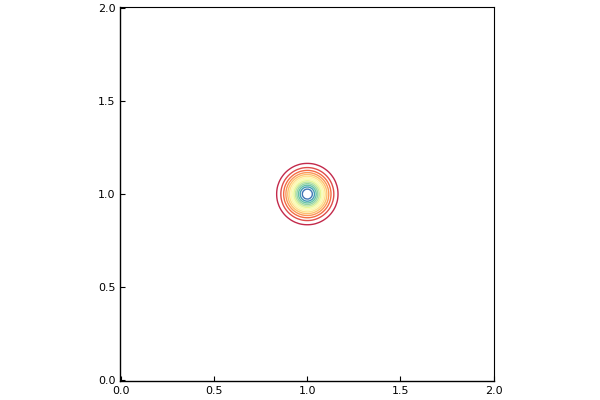

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [11]:
plot(xg,yg,u)

In [12]:
for i = 1:500
    t,state = rk1(t,deepcopy(state));
end     

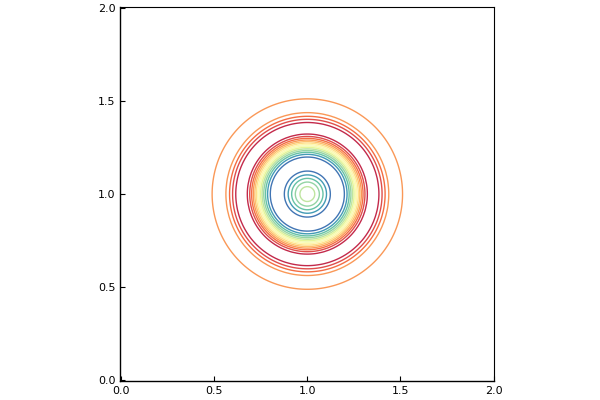

In [13]:
xg, yg = coordinates(u,dx=dx)
plot(xg,yg,state[1])

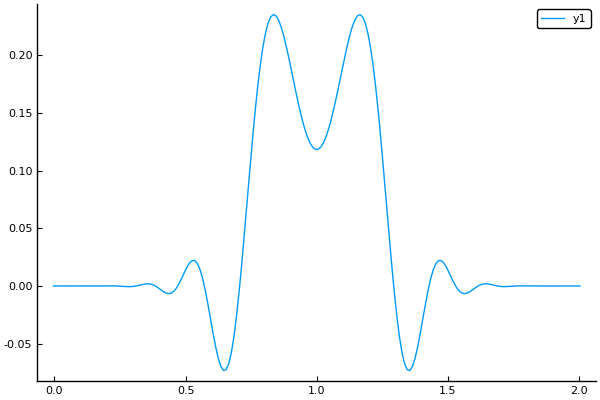

In [14]:
plot(xg,state[1][101,:])

In [15]:
u[101,98:105]

8-element Array{Float64,1}:
 0.8824969025845952
 0.9370674633774033
 0.9753099120283326
 0.9950124791926823
 0.9950124791926822
 0.9753099120283323
 0.9370674633774039
 0.8824969025845959